In [1]:
from traffic import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
Ncars = 30
positions = np.linspace(0, 1000, num=Ncars+1)
cars = [Car(positions[i]) for i in range(Ncars)]
for i in range(Ncars-1):
    cars[i].set_next(cars[i+1])
cars[Ncars-1].set_next(cars[0])

Above code establishes the array of cars needed

In [3]:
sim = Simulation(cars)
sim.run_once()

This snippet establishes the simulation and does a single round

In [4]:
sim.run(15)

Here, it is run for a few seconds

In [5]:
x_vals = np.linspace(0, 1000, num=Ncars)

In [7]:
def plot_things():
    plt.plot(x_vals, sim.dist_array())
    plt.show()

    plt.plot(x_vals, sim.speed_array())
    plt.axis((0,1000,0,35))
    plt.show()

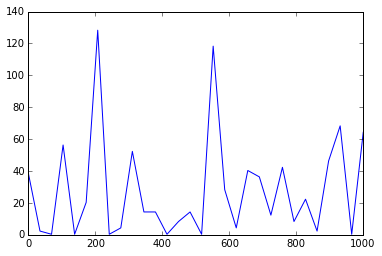

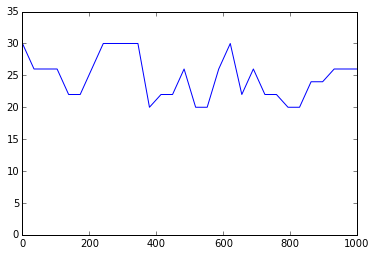

In [8]:
plot_things()

In [9]:
sim.run(60)

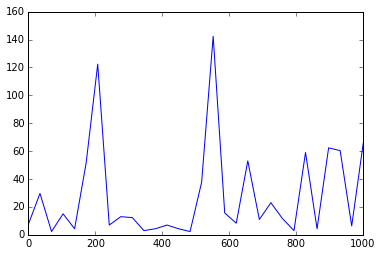

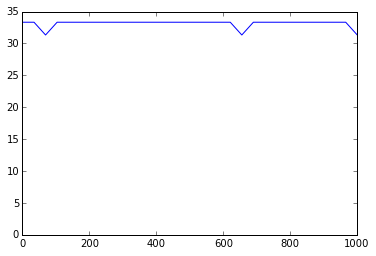

In [10]:
plot_things()